In [ ]:
import os
os.listdir('/content/drive')

['.shortcut-targets-by-id', 'MyDrive', '.file-revisions-by-id', '.Trash-0']

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [ ]:
df.shape

(13320, 9)

In [ ]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
df1 = df.drop('society',axis='columns')
df1.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [ ]:
#drop the sample with null value in location
df2 = df1[~df1['location'].isnull()]

In [ ]:
df2.isnull().sum()

area_type         0
availability      0
location          0
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [ ]:
df2 = df2.fillna('0')

In [ ]:
df2.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [ ]:
a = '2 BHK'
int(a.split(' ')[0])

2

In [ ]:
def fix_size(x):
  return int(x.split(' ')[0])

In [ ]:
df2['size'] = df2['size'].apply(fix_size)

In [ ]:
df2.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056,2,1,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600,5,3,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440,2,3,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521,3,1,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200,2,1,51.00


In [ ]:
df2.dtypes

area_type        object
availability     object
location         object
size              int64
total_sqft       object
bath             object
balcony          object
price           float64
dtype: object

In [ ]:
a = '2100'
#(float(a.split('-')[0]) + float(a.split('-')[1]))/2
a.split('-')

['2100']

In [ ]:
def fix_toatal_sqft(x):
  try:
    if len(x.split('-')) == 2:
      return (float(x.split('-')[0]) + float(x.split('-')[1]))/2
    else:
      return float(x)
  except:
    return None

In [ ]:
df2['total_sqft'] = df2['total_sqft'].apply(fix_toatal_sqft)

In [ ]:
df2 = df2.dropna()

In [ ]:
df2.dtypes

area_type        object
availability     object
location         object
size              int64
total_sqft      float64
bath             object
balcony          object
price           float64
dtype: object

In [ ]:
df2.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [ ]:
df2['bath'] = df2['bath'].astype(int)
df2['balcony'] = df2['balcony'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df2.dtypes

area_type        object
availability     object
location         object
size              int64
total_sqft      float64
bath              int64
balcony           int64
price           float64
dtype: object

In [ ]:
df2.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,1056.0,2,1,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,2600.0,5,3,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,1440.0,2,3,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,1521.0,3,1,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2,1,51.00


In [ ]:
df2['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [ ]:
df2['area_type'].value_counts()

Super built-up  Area    8778
Built-up  Area          2402
Plot  Area              2007
Carpet  Area              86
Name: area_type, dtype: int64

In [ ]:
def fix_area_type(x):
  if x == 'Super built-up  Area':
    return x
  else:
    return 'Built-Up,Plot,Carpet'

In [ ]:
df2['area_type'] = df2['area_type'].apply(fix_area_type)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df2['area_type'].value_counts()

Super built-up  Area    8778
Built-Up,Plot,Carpet    4495
Name: area_type, dtype: int64

In [ ]:
df2['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [ ]:
df2['availability'].value_counts()

Ready To Move    10541
18-Dec             306
18-May             294
18-Apr             271
18-Aug             199
                 ...  
15-Jun               1
16-Oct               1
15-Dec               1
15-Aug               1
16-Nov               1
Name: availability, Length: 81, dtype: int64

In [ ]:
def fix_availability(x):
  if x == 'Ready To Move':
    return x
  else:
    return 'About to ready'

In [ ]:
df2['availability'] = df2['availability'].apply(fix_availability)

In [ ]:
df2.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price
13315,"Built-Up,Plot,Carpet",Ready To Move,Whitefield,5,3453.0,4,0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4,3600.0,5,0,400.0
13317,"Built-Up,Plot,Carpet",Ready To Move,Raja Rajeshwari Nagar,2,1141.0,2,1,60.0
13318,Super built-up Area,About to ready,Padmanabhanagar,4,4689.0,4,1,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1,550.0,1,1,17.0


In [ ]:
len(df2['location'].unique())

1299

In [ ]:
df2.shape

(13273, 8)

In [ ]:
loc_count = df2['location'].value_counts()

In [ ]:
loc_count_more_50 = loc_count[loc_count >= 50]
loc_count_more_50

Whitefield                  538
Sarjapur  Road              399
Electronic City             302
Kanakpura Road              271
Thanisandra                 233
Yelahanka                   213
Uttarahalli                 186
Hebbal                      177
Marathahalli                175
Raja Rajeshwari Nagar       171
Hennur Road                 152
Bannerghatta Road           151
7th Phase JP Nagar          148
Haralur Road                142
Electronic City Phase II    132
Rajaji Nagar                107
Chandapura                  100
Bellandur                    96
KR Puram                     91
Electronics City Phase 1     88
Hoodi                        88
Yeshwanthpur                 85
Begur Road                   84
Sarjapur                     81
Kasavanhalli                 80
Harlur                       79
Banashankari                 75
Hormavu                      74
Kengeri                      72
Koramangala                  72
Ramamurthy Nagar             72
Jakkur  

In [ ]:
'Richards Town' in loc_count_more_50

False

In [ ]:
def fix_location(x):
  return x in loc_count_more_50

In [ ]:
df3 = df2[df2['location'].apply(fix_location)]
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,About to ready,Electronic City Phase II,2,1056.0,2,1,39.07
2,"Built-Up,Plot,Carpet",Ready To Move,Uttarahalli,3,1440.0,2,3,62.00
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2,1,51.00
5,Super built-up Area,Ready To Move,Whitefield,2,1170.0,2,1,38.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4,3300.0,4,0,600.00


In [ ]:
df3.describe()

,size,total_sqft,bath,balcony,price
count,6154.000000,6154.000000,6154.000000,6154.000000,6154.000000
mean,2.643646,1535.609172,2.536724,1.519012,99.557867
std,0.986461,1018.174556,1.110519,0.830536,114.234156
min,0.000000,1.000000,0.000000,0.000000,9.000000
25%,2.000000,1123.000000,2.000000,1.000000,48.000000
50%,3.000000,1290.000000,2.000000,2.000000,68.000000
75%,3.000000,1655.000000,3.000000,2.000000,106.000000
max,12.000000,35000.000000,13.000000,3.000000,2200.000000


#Removing Outliers

In [ ]:
df3['PPS'] = (df3['price'] * 100000)/df3['total_sqft']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,PPS
0,Super built-up Area,About to ready,Electronic City Phase II,2,1056.0,2,1,39.07,3699.810606
2,"Built-Up,Plot,Carpet",Ready To Move,Uttarahalli,3,1440.0,2,3,62.00,4305.555556
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2,1,51.00,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,2,1170.0,2,1,38.00,3247.863248
7,Super built-up Area,Ready To Move,Rajaji Nagar,4,3300.0,4,0,600.00,18181.818182


In [ ]:
df3.describe()

,size,total_sqft,bath,balcony,price,PPS
count,6154.000000,6154.000000,6154.000000,6154.000000,6154.000000,6.154000e+03
mean,2.643646,1535.609172,2.536724,1.519012,99.557867,8.010387e+03
std,0.986461,1018.174556,1.110519,0.830536,114.234156,1.529958e+05
min,0.000000,1.000000,0.000000,0.000000,9.000000,3.714286e+02
25%,2.000000,1123.000000,2.000000,1.000000,48.000000,4.200000e+03
50%,3.000000,1290.000000,2.000000,2.000000,68.000000,5.282940e+03
75%,3.000000,1655.000000,3.000000,2.000000,106.000000,6.685075e+03
max,12.000000,35000.000000,13.000000,3.000000,2200.000000,1.200000e+07


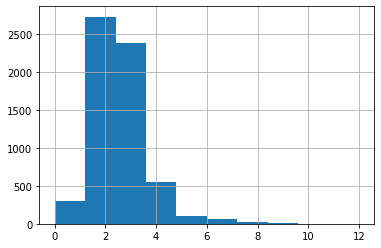

In [ ]:
df3['size'].hist()

#Outliers Example

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


k = np.array([22,19,28,29,31,32,17,26,27,33,25,15])

k_mean = k.mean()
var_k = ((k - k_mean)**2).mean()
std_k = var_k**0.5

print(k_mean)
print(var_k)
print(std_k)

25.333333333333332
32.22222222222222
5.676462121975467


In [ ]:
k.std()

5.676462121975467

In [ ]:
print(k_mean - 3 * std_k)
print(k_mean + 3 * std_k)

8.303946967406933
42.36271969925973


#Outliers using PPS and location

In [ ]:
df3.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,PPS
0,Super built-up Area,About to ready,Electronic City Phase II,2,1056.0,2,1,39.07,3699.810606
2,"Built-Up,Plot,Carpet",Ready To Move,Uttarahalli,3,1440.0,2,3,62.00,4305.555556
4,Super built-up Area,Ready To Move,Kothanur,2,1200.0,2,1,51.00,4250.000000
5,Super built-up Area,Ready To Move,Whitefield,2,1170.0,2,1,38.00,3247.863248
7,Super built-up Area,Ready To Move,Rajaji Nagar,4,3300.0,4,0,600.00,18181.818182


In [ ]:
df4 = pd.DataFrame()
for key,group in df3.groupby('location'):
  #print(key,group)
  m = group['PPS'].mean()
  s = group['PPS'].std()

  extracted_df = group[(group['PPS'] >= (m-2*s)) & (group['PPS'] <= (m+2*s))]
  df4 = pd.concat([df4,extracted_df] , ignore_index=True)

In [ ]:
df4.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,PPS
0,Super built-up Area,Ready To Move,7th Phase JP Nagar,2,1000.0,2,1,38.0,3800.000000
1,"Built-Up,Plot,Carpet",Ready To Move,7th Phase JP Nagar,2,1080.0,2,2,72.0,6666.666667
2,Super built-up Area,Ready To Move,7th Phase JP Nagar,2,1270.0,2,2,93.0,7322.834646
3,"Built-Up,Plot,Carpet",Ready To Move,7th Phase JP Nagar,3,1420.0,2,1,100.0,7042.253521
4,"Built-Up,Plot,Carpet",Ready To Move,7th Phase JP Nagar,3,1850.0,3,1,150.0,8108.108108


In [ ]:
print(df3.shape)
print(df4.shape)

(6154, 9)
(5941, 9)


In [ ]:
df4.describe()

,size,total_sqft,bath,balcony,price,PPS
count,5941.000000,5941.000000,5941.000000,5941.000000,5941.000000,5941.000000
mean,2.588285,1517.437205,2.476856,1.524491,93.632137,5692.625106
std,0.891311,851.845946,1.012553,0.819757,100.569072,2476.376879
min,0.000000,276.000000,0.000000,0.000000,9.000000,875.000000
25%,2.000000,1124.000000,2.000000,1.000000,47.590000,4177.109440
50%,2.000000,1290.000000,2.000000,2.000000,67.000000,5212.765957
75%,3.000000,1650.000000,3.000000,2.000000,100.000000,6511.627907
max,12.000000,20000.000000,12.000000,3.000000,2200.000000,27692.307692


In [ ]:
df4['location'].unique()

array(['7th Phase JP Nagar', '8th Phase JP Nagar', 'Akshaya Nagar',
       'Banashankari', 'Bannerghatta Road', 'Begur Road', 'Bellandur',
       'Bisuvanahalli', 'Budigere', 'Chandapura', 'Electronic City',
       'Electronic City Phase II', 'Electronics City Phase 1',
       'HSR Layout', 'Haralur Road', 'Harlur', 'Hebbal', 'Hennur',
       'Hennur Road', 'Hoodi', 'Hormavu', 'Hosa Road', 'Hulimavu',
       'JP Nagar', 'Jakkur', 'Jalahalli', 'Jigani', 'KR Puram',
       'Kaggadasapura', 'Kanakpura Road', 'Kasavanhalli', 'Kengeri',
       'Koramangala', 'Kothanur', 'Malleshwaram', 'Marathahalli',
       'Mysore Road', 'Nagarbhavi', 'Old Madras Road', 'Panathur',
       'Rachenahalli', 'Raja Rajeshwari Nagar', 'Rajaji Nagar',
       'Ramagondanahalli', 'Ramamurthy Nagar', 'Sarjapur',
       'Sarjapur  Road', 'TC Palaya', 'Thanisandra', 'Thigalarapalya',
       'Uttarahalli', 'Varthur', 'Whitefield', 'Yelahanka',
       'Yeshwanthpur'], dtype=object)

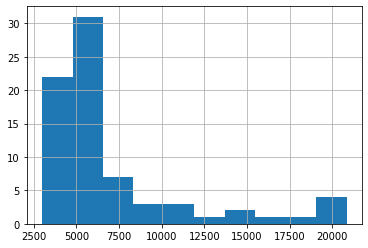

In [ ]:
df3[df3['location'] == 'Banashankari']['PPS'].hist()

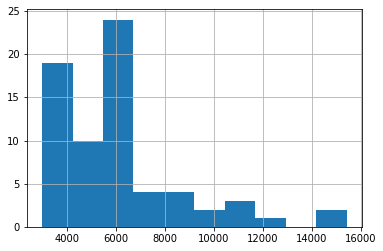

In [ ]:
df4[df4['location'] == 'Banashankari']['PPS'].hist()

In [ ]:
df4.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,PPS
0,Super built-up Area,Ready To Move,7th Phase JP Nagar,2,1000.0,2,1,38.0,3800.000000
1,"Built-Up,Plot,Carpet",Ready To Move,7th Phase JP Nagar,2,1080.0,2,2,72.0,6666.666667
2,Super built-up Area,Ready To Move,7th Phase JP Nagar,2,1270.0,2,2,93.0,7322.834646
3,"Built-Up,Plot,Carpet",Ready To Move,7th Phase JP Nagar,3,1420.0,2,1,100.0,7042.253521
4,"Built-Up,Plot,Carpet",Ready To Move,7th Phase JP Nagar,3,1850.0,3,1,150.0,8108.108108


In [ ]:
df4.describe()

,size,total_sqft,bath,balcony,price,PPS
count,5941.000000,5941.000000,5941.000000,5941.000000,5941.000000,5941.000000
mean,2.588285,1517.437205,2.476856,1.524491,93.632137,5692.625106
std,0.891311,851.845946,1.012553,0.819757,100.569072,2476.376879
min,0.000000,276.000000,0.000000,0.000000,9.000000,875.000000
25%,2.000000,1124.000000,2.000000,1.000000,47.590000,4177.109440
50%,2.000000,1290.000000,2.000000,2.000000,67.000000,5212.765957
75%,3.000000,1650.000000,3.000000,2.000000,100.000000,6511.627907
max,12.000000,20000.000000,12.000000,3.000000,2200.000000,27692.307692


In [ ]:
df4['size'].unique()

array([ 2,  3,  4,  6,  7,  1,  5,  9,  8, 10,  0, 12])

In [ ]:
df4['size'].value_counts()

2     2703
3     2350
4      467
1      287
5       72
6       28
8       12
7        8
9        6
0        5
10       2
12       1
Name: size, dtype: int64

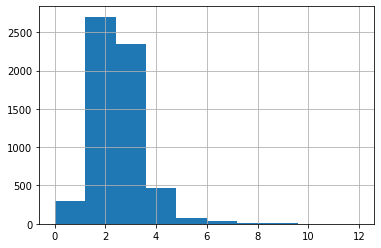

In [ ]:
df4['size'].hist()

In [ ]:
#Remove data samples with 0,9,10 and 12v bedrooms considering these as outliers
df5 = df4[~df4['size'].isin([0,9,10,12])]

In [ ]:
df5.groupby('size')['total_sqft'].mean()

size
1     671.547038
2    1145.675055
3    1656.644013
4    3025.795203
5    3316.388889
6    2581.784643
7    4890.625000
8    3111.666667
Name: total_sqft, dtype: float64

In [ ]:
df5.groupby('size')['total_sqft'].min()

size
1     300.0
2     276.0
3     600.0
4     540.0
5     600.0
6     710.0
7    1200.0
8     840.0
Name: total_sqft, dtype: float64

In [ ]:
#Remove the samples with less then 300 sqft for any bed room
df6 = df5[(df5['total_sqft'] / df5['size']) >= 300]

In [ ]:
df6.groupby('size')['total_sqft'].min()

size
1     300.0
2     600.0
3     900.0
4    1200.0
5    1500.0
6    1800.0
7    2425.0
8    3000.0
Name: total_sqft, dtype: float64

In [ ]:
df6.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,PPS
0,Super built-up Area,Ready To Move,7th Phase JP Nagar,2,1000.0,2,1,38.0,3800.000000
1,"Built-Up,Plot,Carpet",Ready To Move,7th Phase JP Nagar,2,1080.0,2,2,72.0,6666.666667
2,Super built-up Area,Ready To Move,7th Phase JP Nagar,2,1270.0,2,2,93.0,7322.834646
3,"Built-Up,Plot,Carpet",Ready To Move,7th Phase JP Nagar,3,1420.0,2,1,100.0,7042.253521
4,"Built-Up,Plot,Carpet",Ready To Move,7th Phase JP Nagar,3,1850.0,3,1,150.0,8108.108108


In [ ]:
df6.describe()

,size,total_sqft,bath,balcony,price,PPS
count,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000
mean,2.556050,1524.585390,2.450111,1.530207,93.438050,5617.791282
std,0.804429,851.943772,0.944199,0.816785,100.953553,2324.894181
min,1.000000,300.000000,0.000000,0.000000,9.000000,875.000000
25%,2.000000,1125.000000,2.000000,1.000000,47.395000,4168.924303
50%,2.000000,1296.000000,2.000000,2.000000,66.250000,5194.805195
75%,3.000000,1654.000000,3.000000,2.000000,100.000000,6466.589684
max,8.000000,20000.000000,9.000000,3.000000,2200.000000,27692.307692


In [ ]:
df6['size'].unique()

array([2, 3, 4, 6, 7, 1, 5, 8])

In [ ]:
df6['bath'].unique()

array([2, 3, 4, 7, 1, 5, 6, 0, 8, 9])

In [ ]:
df6.groupby('size')['bath','balcony'].max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,bath,balcony
size,,
1,2,2
2,3,3
3,6,3
4,6,3
5,8,3
6,7,3
7,7,3
8,9,3


In [ ]:
def fix_zero_bath(x):
  return x + 1

def fix_zero_balc(x):
  return 3

In [ ]:
dfa = df6[df6['bath'] != 0]
dfb = df6[df6['bath'] == 0]

In [ ]:
dfb.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,PPS
786,"Built-Up,Plot,Carpet",Ready To Move,Chandapura,4,1891.0,0,0,66.165,3498.942359
791,Super built-up Area,About to ready,Chandapura,3,1162.5,0,0,30.215,2599.139785
1192,"Built-Up,Plot,Carpet",Ready To Move,Electronic City Phase II,4,3550.0,0,0,167.500,4718.309859
1317,Super built-up Area,Ready To Move,Electronics City Phase 1,3,1522.5,0,0,60.750,3990.147783
1442,Super built-up Area,About to ready,Haralur Road,4,3185.0,0,0,175.000,5494.505495


In [ ]:
dfb['bath'] = dfb['size'].apply(fix_zero_bath)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dfb.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,PPS
786,"Built-Up,Plot,Carpet",Ready To Move,Chandapura,4,1891.0,5,0,66.165,3498.942359
791,Super built-up Area,About to ready,Chandapura,3,1162.5,4,0,30.215,2599.139785
1192,"Built-Up,Plot,Carpet",Ready To Move,Electronic City Phase II,4,3550.0,5,0,167.500,4718.309859
1317,Super built-up Area,Ready To Move,Electronics City Phase 1,3,1522.5,4,0,60.750,3990.147783
1442,Super built-up Area,About to ready,Haralur Road,4,3185.0,5,0,175.000,5494.505495


In [ ]:
df7 = pd.concat((dfa,dfb),ignore_index=True)

In [ ]:
df7.describe()

,size,total_sqft,bath,balcony,price,PPS
count,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000
mean,2.556050,1524.585390,2.484511,1.530207,93.438050,5617.791282
std,0.804429,851.943772,0.935012,0.816785,100.953553,2324.894181
min,1.000000,300.000000,1.000000,0.000000,9.000000,875.000000
25%,2.000000,1125.000000,2.000000,1.000000,47.395000,4168.924303
50%,2.000000,1296.000000,2.000000,2.000000,66.250000,5194.805195
75%,3.000000,1654.000000,3.000000,2.000000,100.000000,6466.589684
max,8.000000,20000.000000,9.000000,3.000000,2200.000000,27692.307692


In [ ]:
dfa = df7[df7['balcony'] != 0]
dfb = df7[df7['balcony'] == 0]

In [ ]:
dfb.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,PPS
11,Super built-up Area,Ready To Move,7th Phase JP Nagar,2,1100.0,2,0,46.0,4181.818182
25,"Built-Up,Plot,Carpet",Ready To Move,7th Phase JP Nagar,6,5080.0,7,0,450.0,8858.267717
34,"Built-Up,Plot,Carpet",Ready To Move,7th Phase JP Nagar,4,3300.0,4,0,150.0,4545.454545
35,Super built-up Area,About to ready,7th Phase JP Nagar,4,2503.0,4,0,188.0,7510.986816
46,"Built-Up,Plot,Carpet",Ready To Move,7th Phase JP Nagar,7,4800.0,7,0,170.0,3541.666667


In [ ]:
dfb['balcony'] = dfb['size'].apply(fix_zero_balc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df8 = pd.concat((dfa,dfb),ignore_index=True)

In [ ]:
df8.describe()

,size,total_sqft,bath,balcony,price,PPS
count,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000,5843.000000
mean,2.556050,1524.585390,2.484511,1.818244,93.438050,5617.791282
std,0.804429,851.943772,0.935012,0.752830,100.953553,2324.894181
min,1.000000,300.000000,1.000000,1.000000,9.000000,875.000000
25%,2.000000,1125.000000,2.000000,1.000000,47.395000,4168.924303
50%,2.000000,1296.000000,2.000000,2.000000,66.250000,5194.805195
75%,3.000000,1654.000000,3.000000,2.000000,100.000000,6466.589684
max,8.000000,20000.000000,9.000000,3.000000,2200.000000,27692.307692


In [ ]:
df8.shape

(5843, 9)

In [ ]:
df8.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,PPS
0,Super built-up Area,Ready To Move,7th Phase JP Nagar,2,1000.0,2,1,38.0,3800.000000
1,"Built-Up,Plot,Carpet",Ready To Move,7th Phase JP Nagar,2,1080.0,2,2,72.0,6666.666667
2,Super built-up Area,Ready To Move,7th Phase JP Nagar,2,1270.0,2,2,93.0,7322.834646
3,"Built-Up,Plot,Carpet",Ready To Move,7th Phase JP Nagar,3,1420.0,2,1,100.0,7042.253521
4,"Built-Up,Plot,Carpet",Ready To Move,7th Phase JP Nagar,3,1850.0,3,1,150.0,8108.108108


In [ ]:
df8['area_type'] = df8['area_type'].str.lower()
df8['area_type'] = df8['area_type'].str.strip()

df8['availability'] = df8['availability'].str.lower()
df8['availability'] = df8['availability'].str.strip()

df8['location'] = df8['location'].str.lower()
df8['location'] = df8['location'].str.strip()

In [ ]:
dfx = pd.get_dummies(df8['area_type'])
dfy = pd.get_dummies(df8['availability'])
dfz = pd.get_dummies(df8['location'])

In [ ]:
dfz

,7th phase jp nagar,8th phase jp nagar,akshaya nagar,banashankari,bannerghatta road,begur road,bellandur,bisuvanahalli,budigere,chandapura,electronic city,electronic city phase ii,electronics city phase 1,haralur road,harlur,hebbal,hennur,hennur road,hoodi,hormavu,hosa road,hsr layout,hulimavu,jakkur,jalahalli,jigani,jp nagar,kaggadasapura,kanakpura road,kasavanhalli,kengeri,koramangala,kothanur,kr puram,malleshwaram,marathahalli,mysore road,nagarbhavi,old madras road,panathur,rachenahalli,raja rajeshwari nagar,rajaji nagar,ramagondanahalli,ramamurthy nagar,sarjapur,sarjapur road,tc palaya,thanisandra,thigalarapalya,uttarahalli,varthur,whitefield,yelahanka,yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5838,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5839,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5840,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5841,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df9 = pd.concat((df8,dfx,dfy,dfz),axis='columns')

In [ ]:
df9.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,PPS,"built-up,plot,carpet",super built-up area,about to ready,ready to move,7th phase jp nagar,8th phase jp nagar,akshaya nagar,banashankari,bannerghatta road,begur road,bellandur,bisuvanahalli,budigere,chandapura,electronic city,electronic city phase ii,electronics city phase 1,haralur road,harlur,hebbal,hennur,hennur road,hoodi,hormavu,hosa road,hsr layout,hulimavu,jakkur,jalahalli,jigani,jp nagar,kaggadasapura,kanakpura road,kasavanhalli,kengeri,koramangala,kothanur,kr puram,malleshwaram,marathahalli,mysore road,nagarbhavi,old madras road,panathur,rachenahalli,raja rajeshwari nagar,rajaji nagar,ramagondanahalli,ramamurthy nagar,sarjapur,sarjapur road,tc palaya,thanisandra,thigalarapalya,uttarahalli,varthur,whitefield,yelahanka,yeshwanthpur
0,super built-up area,ready to move,7th phase jp nagar,2,1000.0,2,1,38.0,3800.000000,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"built-up,plot,carpet",ready to move,7th phase jp nagar,2,1080.0,2,2,72.0,6666.666667,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,super built-up area,ready to move,7th phase jp nagar,2,1270.0,2,2,93.0,7322.834646,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"built-up,plot,carpet",ready to move,7th phase jp nagar,3,1420.0,2,1,100.0,7042.253521,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"built-up,plot,carpet",ready to move,7th phase jp nagar,3,1850.0,3,1,150.0,8108.108108,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df10 = df9.drop(['area_type','availability','location','PPS'],axis='columns')

In [ ]:
df10.head()

,size,total_sqft,bath,balcony,price,"built-up,plot,carpet",super built-up area,about to ready,ready to move,7th phase jp nagar,8th phase jp nagar,akshaya nagar,banashankari,bannerghatta road,begur road,bellandur,bisuvanahalli,budigere,chandapura,electronic city,electronic city phase ii,electronics city phase 1,haralur road,harlur,hebbal,hennur,hennur road,hoodi,hormavu,hosa road,hsr layout,hulimavu,jakkur,jalahalli,jigani,jp nagar,kaggadasapura,kanakpura road,kasavanhalli,kengeri,koramangala,kothanur,kr puram,malleshwaram,marathahalli,mysore road,nagarbhavi,old madras road,panathur,rachenahalli,raja rajeshwari nagar,rajaji nagar,ramagondanahalli,ramamurthy nagar,sarjapur,sarjapur road,tc palaya,thanisandra,thigalarapalya,uttarahalli,varthur,whitefield,yelahanka,yeshwanthpur
0,2,1000.0,2,1,38.0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1080.0,2,2,72.0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1270.0,2,2,93.0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1420.0,2,1,100.0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3,1850.0,3,1,150.0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df10.to_csv('real_estate_preprocessed.csv')

In [ ]:
#Features
x = df10.drop('price',axis='columns')
#label
y = df10[['price']]

In [ ]:
y.head()

,price
0,38.0
1,72.0
2,93.0
3,100.0
4,150.0


In [ ]:
#train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8)

In [ ]:
xtest.head()

,size,total_sqft,bath,balcony,"built-up,plot,carpet",super built-up area,about to ready,ready to move,7th phase jp nagar,8th phase jp nagar,akshaya nagar,banashankari,bannerghatta road,begur road,bellandur,bisuvanahalli,budigere,chandapura,electronic city,electronic city phase ii,electronics city phase 1,haralur road,harlur,hebbal,hennur,hennur road,hoodi,hormavu,hosa road,hsr layout,hulimavu,jakkur,jalahalli,jigani,jp nagar,kaggadasapura,kanakpura road,kasavanhalli,kengeri,koramangala,kothanur,kr puram,malleshwaram,marathahalli,mysore road,nagarbhavi,old madras road,panathur,rachenahalli,raja rajeshwari nagar,rajaji nagar,ramagondanahalli,ramamurthy nagar,sarjapur,sarjapur road,tc palaya,thanisandra,thigalarapalya,uttarahalli,varthur,whitefield,yelahanka,yeshwanthpur
2911,2,1152.0,2,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3700,3,1249.0,3,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
188,3,1360.0,2,2,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5126,2,1322.0,2,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4614,2,1280.0,2,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
from sklearn.linear_model import LinearRegression
lmodel = LinearRegression()

lmodel.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
ytrain_pred = lmodel.predict(xtrain)
ytest_pred = lmodel.predict(xtest)

In [ ]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(ytrain,ytrain_pred))
print(mean_absolute_error(ytest,ytest_pred))

23.250865424976016
21.465245672377694


In [ ]:
test_predictions = np.hstack((ytest.values,ytest_pred))

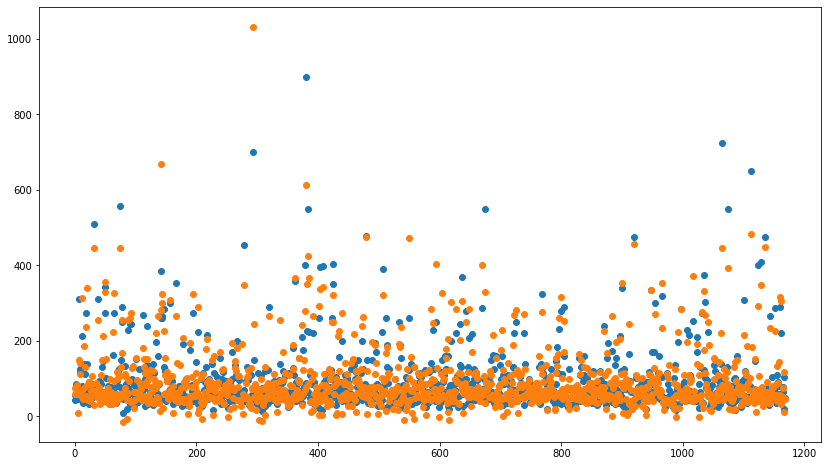

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,8))

plt.scatter(range(len(ytest)) , test_predictions[:,0:1])

plt.scatter(range(len(ytest)) , test_predictions[:,1:2])

plt.show()


In [ ]:
xtrain.head()

,size,total_sqft,bath,balcony,"built-up,plot,carpet",super built-up area,about to ready,ready to move,7th phase jp nagar,8th phase jp nagar,akshaya nagar,banashankari,bannerghatta road,begur road,bellandur,bisuvanahalli,budigere,chandapura,electronic city,electronic city phase ii,electronics city phase 1,haralur road,harlur,hebbal,hennur,hennur road,hoodi,hormavu,hosa road,hsr layout,hulimavu,jakkur,jalahalli,jigani,jp nagar,kaggadasapura,kanakpura road,kasavanhalli,kengeri,koramangala,kothanur,kr puram,malleshwaram,marathahalli,mysore road,nagarbhavi,old madras road,panathur,rachenahalli,raja rajeshwari nagar,rajaji nagar,ramagondanahalli,ramamurthy nagar,sarjapur,sarjapur road,tc palaya,thanisandra,thigalarapalya,uttarahalli,varthur,whitefield,yelahanka,yeshwanthpur
4544,3,1737.0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5289,1,451.0,1,3,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1262,3,2400.0,3,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
843,2,1090.0,2,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3210,2,1255.0,2,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
xtest.head()

,size,total_sqft,bath,balcony,"built-up,plot,carpet",super built-up area,about to ready,ready to move,7th phase jp nagar,8th phase jp nagar,akshaya nagar,banashankari,bannerghatta road,begur road,bellandur,bisuvanahalli,budigere,chandapura,electronic city,electronic city phase ii,electronics city phase 1,haralur road,harlur,hebbal,hennur,hennur road,hoodi,hormavu,hosa road,hsr layout,hulimavu,jakkur,jalahalli,jigani,jp nagar,kaggadasapura,kanakpura road,kasavanhalli,kengeri,koramangala,kothanur,kr puram,malleshwaram,marathahalli,mysore road,nagarbhavi,old madras road,panathur,rachenahalli,raja rajeshwari nagar,rajaji nagar,ramagondanahalli,ramamurthy nagar,sarjapur,sarjapur road,tc palaya,thanisandra,thigalarapalya,uttarahalli,varthur,whitefield,yelahanka,yeshwanthpur
2911,2,1152.0,2,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3700,3,1249.0,3,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
188,3,1360.0,2,2,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5126,2,1322.0,2,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4614,2,1280.0,2,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
lmodel.predict(xtest)

array([[ 59.46660233],
       [ 75.70939255],
       [ 58.2054863 ],
       ...,
       [ 11.60085678],
       [117.97034454],
       [ 46.94301605]])

In [ ]:
a_type = 'super built-up  area'

np.where(xtrain.columns == a_type)[0][0]

5

In [ ]:
input = np.zeros(len(xtrain.columns))

size = 3
t_sqft = 1500
bath = 4
balc = 3

a_type = 'super built-up  area'
p_type = 'ready to move'
loc = '8th phase jp nagar'

input[0] = size
input[1] = t_sqft
input[2] = bath
input[3] = balc

input[np.where(xtrain.columns == a_type)[0][0]] = 1
input[np.where(xtrain.columns == p_type)[0][0]] = 1
input[np.where(xtrain.columns == loc)[0][0]] = 1

In [ ]:
print(input)

[3.0e+00 1.5e+03 4.0e+00 3.0e+00 0.0e+00 1.0e+00 0.0e+00 1.0e+00 0.0e+00
 1.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00]


In [ ]:
print(lmodel.predict([input]))

[[90.48423767]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
def predict_price(size,t_sqft,bath,balc,a_type,p_type,loc):

  input = np.zeros(len(xtrain.columns))

  input[0] = size
  input[1] = t_sqft
  input[2] = bath
  input[3] = balc

  input[np.where(xtrain.columns == a_type)[0][0]] = 1
  input[np.where(xtrain.columns == p_type)[0][0]] = 1
  input[np.where(xtrain.columns == loc)[0][0]] = 1

  return lmodel.predict([input])[0][0]

In [ ]:
print(predict_price(2,900,2,2,'super built-up  area','ready to move','banashankari'))

42.56068420410156


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


#Save and download the model

In [ ]:
import pickle
with open('real_estate.pickle','wb') as f:
  pickle.dump(lmodel,f)

In [ ]:
import json

columns = {'data_columns' : [col for col in xtrain.columns]}

with open('columns.json' , 'w') as f:
  f.write(json.dumps(columns))

In [ ]:
import pandas as pd

k = pd.DataFrame({'a':[1,2,3,4,5] , 'b':[5,4,3,2,1] , 'c':[0,0,0,0,0] , 'd':[0,0,0,0,0]})
k

,a,b,c,d
0,1,5,0,0
1,2,4,0,0
2,3,3,0,0
3,4,2,0,0
4,5,1,0,0


In [ ]:
e = [9,8,7,6,5]
k['c'] = e
k

,a,b,c,d
0,1,5,9,0
1,2,4,8,0
2,3,3,7,0
3,4,2,6,0
4,5,1,5,0


In [ ]:
f = [0]
for val in range(len(e)-1):
  f.append(e[val])

print(f)

[0, 9, 8, 7, 6]


In [ ]:
k['d'] = f

In [ ]:
k

,a,b,c,d
0,1,5,9,0
1,2,4,8,9
2,3,3,7,8
3,4,2,6,7
4,5,1,5,6
